In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [14]:
pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /home/magdi007/.local/lib/python3.8/site-packages (0.19.0)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import arulesviz

In [16]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

In [3]:
aisles = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/aisles.csv/aisles.csv', header = [0])

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/departments.csv/departments.csv', header = [0])

In [5]:
#order_products_prior = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv', header = [0])
orders_products_prior = pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/instacart_transaction.csv')

In [6]:
order_products_train = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')

In [7]:
orders = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/orders.csv/orders.csv')

In [8]:
products = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/products.csv/products.csv')

In [9]:
sample_submission = pd.read_csv('F:/Sem1/Projects/Data Mining/Group Project/instacart-market-basket-analysis/sample_submission.csv/sample_submission.csv')

In [10]:
orders.shape

(3421083, 7)

In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
orders_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [17]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [ ]:
pd.merge(orders_products_prior, order_products_train, on='order_id', how='inner')

,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y


In [ ]:
max_order_count = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

In [ ]:
max_order_count.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

In [ ]:
max_order_count = max_order_count.order_number.value_counts()

In [60]:
aisles.shape

(134, 2)

In [ ]:
aisles.value_counts()

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

In [ ]:
aisles.nunique

<bound method DataFrame.nunique of      aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]>

In [ ]:
departments.shape

(21, 2)

In [ ]:
departments.value_counts()

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
dtype: int64

In [61]:
products.shape

(49688, 4)

In [ ]:
products.value_counts(sort=True)

product_id  product_name                                     aisle_id  department_id
1           Chocolate Sandwich Cookies                       61        19               1
33142       Black Raspberry Water                            100       21               1
33120       Organic Egg Whites                               86        16               1
33121       Oikos Yogurt Drink, Strawberry                   120       16               1
33122       Peanut Butter Dark Chocolate Protein Chewy Bars  3         19               1
                                                                                       ..
16566       Fajita Mix                                       123       4                1
16567       Premium Enriched Egg Noodles Barley Shape        33        6                1
16568       Dishwasher Detergent                             74        17               1
16569       Hummus Original                                  67        20               1
49688       Fre

In [ ]:
orders.shape

(3421083, 7)

In [62]:
(orders_products_prior.reordered.sum()/orders_products_prior.shape[0])*100

58.97427641085293

In [63]:
(order_products_train.reordered.sum()/order_products_train.shape[0])*100

59.859441275096295

In [66]:
no_of_prods_per_order = orders_products_prior.groupby("order_id")["add_to_cart_order"].aggregate(np.max).reset_index()

In [67]:
no_of_prods_per_order = no_of_prods_per_order.add_to_cart_order.value_counts()

In [68]:
no_of_prods_per_order.head()

5.0    29863
6.0    29710
4.0    28863
7.0    28742
3.0    26784
Name: add_to_cart_order, dtype: int64

/home/magdi007/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


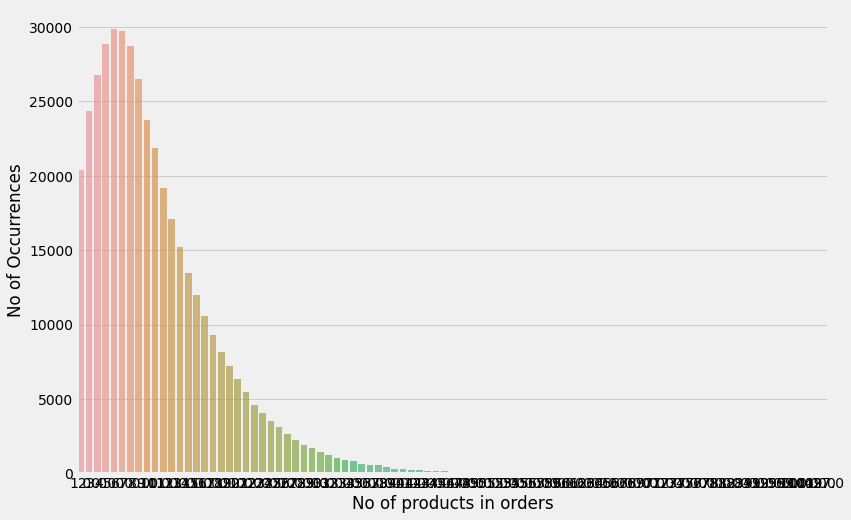

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(no_of_prods_per_order.index, no_of_prods_per_order.values, alpha=0.7)
plt.ylabel('No of Occurrences')
plt.xlabel('No of products in orders')
plt.show()

In [72]:
no_of_prods_per_order_train = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate(np.max).reset_index()
no_of_prods_per_order_train = no_of_prods_per_order_train.add_to_cart_order.value_counts()

/home/magdi007/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


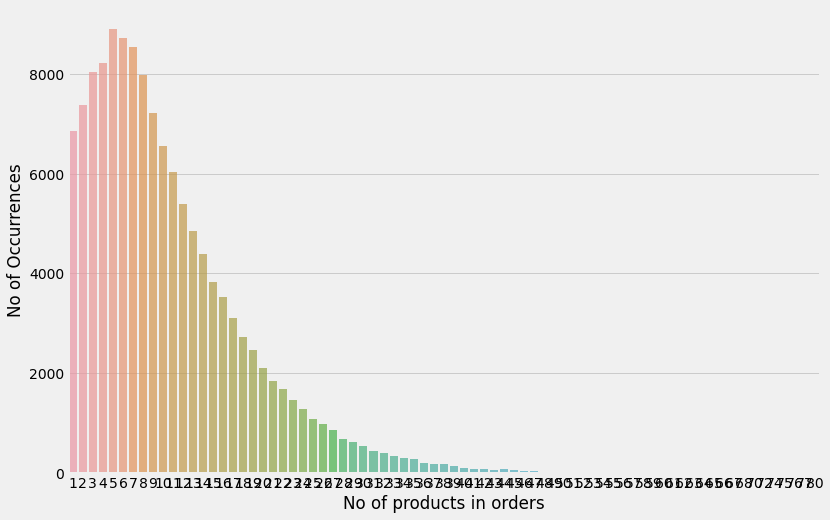

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(no_of_prods_per_order_train.index, no_of_prods_per_order_train.values, alpha=0.7)
plt.ylabel('No of Occurrences')
plt.xlabel('No of products in orders')
plt.show()

In [ ]:
no_of_prods_per_order_train.values.sum()

131209

In [ ]:
df_temp = no_of_prods_per_order_train[no_of_prods_per_order_train.index<25]

In [ ]:
df_temp.values.sum()

123062

In [ ]:
df_temp.values.sum()/no_of_prods_per_order_train.values.sum()

0.9379082227591096

In [ ]:
df_temp2 = no_of_prods_per_order[no_of_prods_per_order.index<25]

In [ ]:
df_temp2.values.sum()/no_of_prods_per_order.values.sum()

0.9482275199587915

In [11]:
orders_prior_prods = pd.merge(orders_products_prior, products, on='product_id', how='left')

In [85]:
orders_prior_prods.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [74]:
orders_prior_prods_aisles = pd.merge(orders_prior_prods, aisles, on='aisle_id', how='left')

In [75]:
orders_prior_prods_aisles.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients


In [76]:
orders_prior_prods_aisles_dept = pd.merge(orders_prior_prods_aisles, departments, on='department_id', how='left')

In [77]:
orders_prior_prods_aisles_dept.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs
1,2,28985.0,2.0,1.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce
2,2,9327.0,3.0,0.0,Garlic Powder,104.0,13.0,spices seasonings,pantry
3,2,45918.0,4.0,1.0,Coconut Butter,19.0,13.0,oils vinegars,pantry
4,2,30035.0,5.0,0.0,Natural Sweetener,17.0,13.0,baking ingredients,pantry


In [78]:
orders_prior_prods_aisles_dept.shape

(4223633, 9)

In [ ]:
orders_prior_prods_aisles_dept['department'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [ ]:
aisle_eda = orders_prior_prods_aisles_dept['aisle'].value_counts().nlargest(n=20)

C:\Users\Gude\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


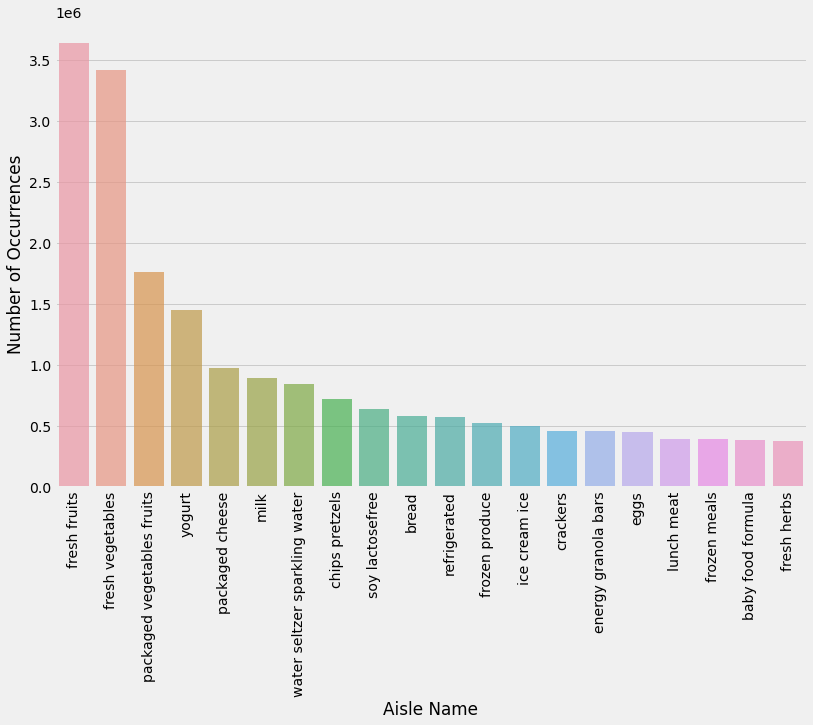

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(aisle_eda.index, aisle_eda.values, alpha=0.7)
plt.ylabel('Number of Occurrences')
plt.xlabel('Aisle Name')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
aisle_eda_reord = orders_prior_prods_aisles_dept[orders_prior_prods_aisles_dept['reordered']==1]
aisle_eda_reord = aisle_eda_reord['aisle'].value_counts().nlargest(n=20)

C:\Users\Gude\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


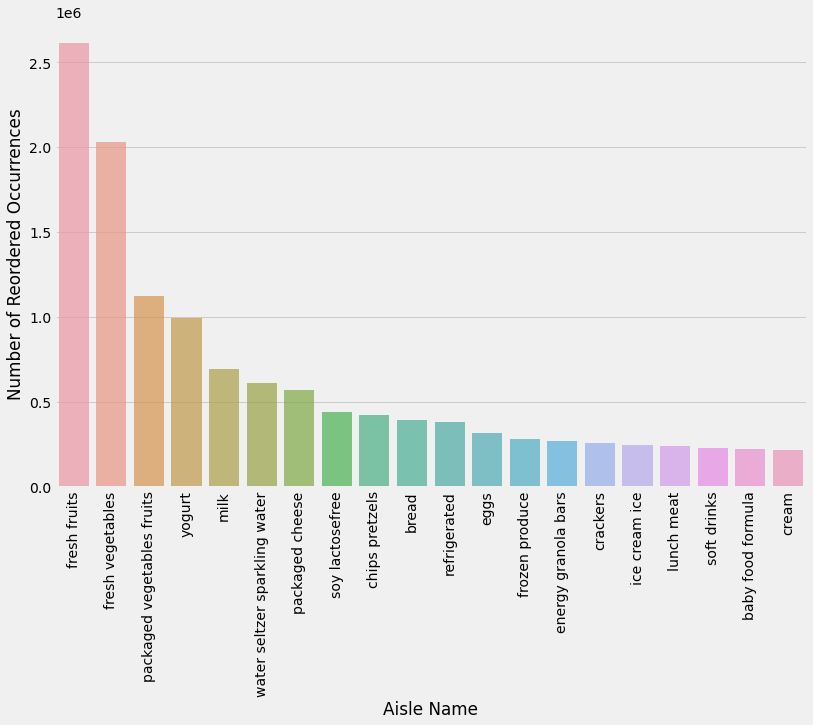

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(aisle_eda_reord.index, aisle_eda_reord.values, alpha=0.7)
plt.ylabel('Number of Reordered Occurrences')
plt.xlabel('Aisle Name')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
orders_prior_prods_days = pd.merge(orders_prior_prods, orders, on='order_id', how='left')

In [ ]:
orders_prior_prods_days.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


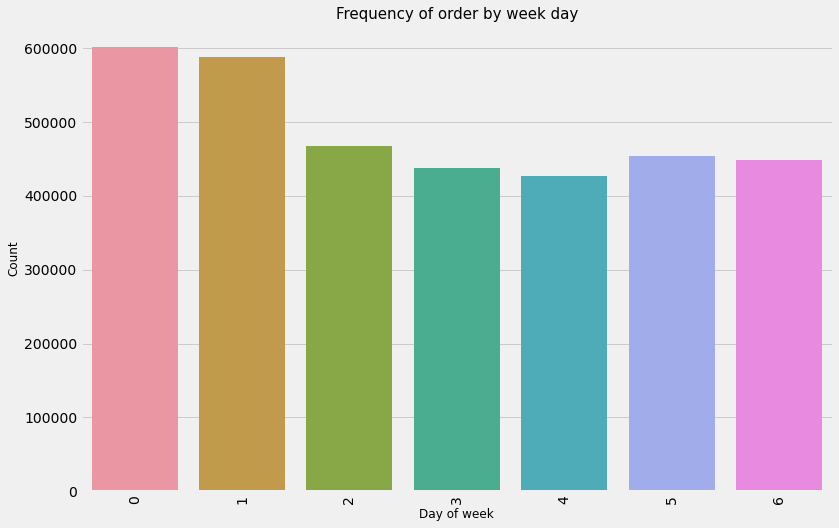

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

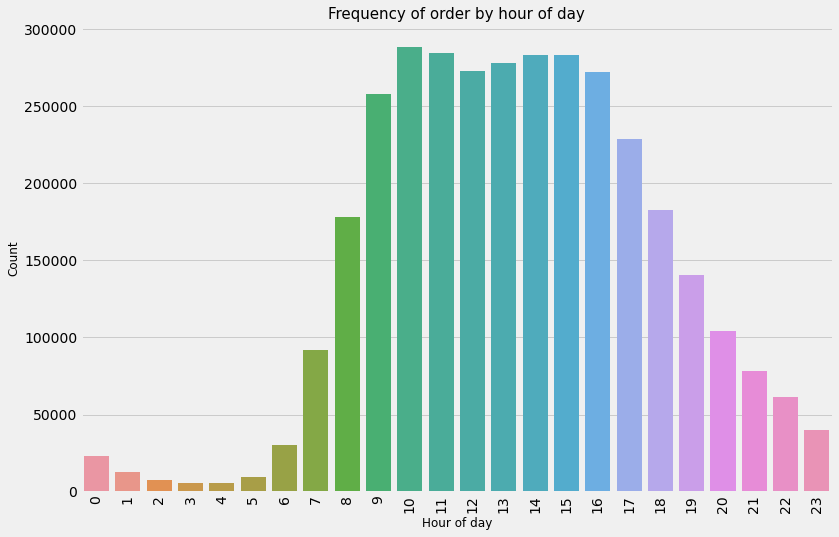

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

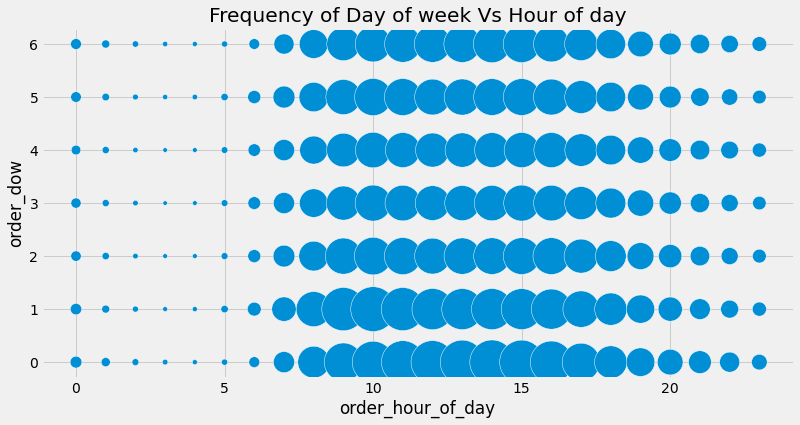

In [ ]:
grouped_df_ord = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
#grouped_df_ord = grouped_df_ord.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.scatterplot(data=grouped_df_ord, x="order_hour_of_day", y="order_dow", size="order_number", legend=False, sizes=(20, 2000))
#sns.heatmap(grouped_df_ord)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

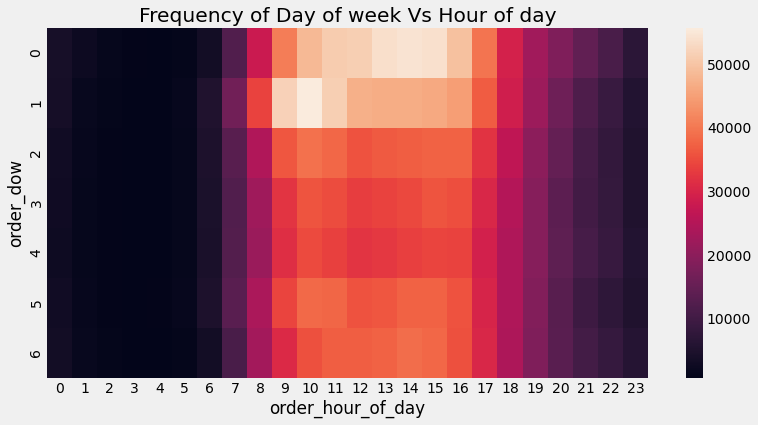

In [ ]:
grouped_df_ord = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df_ord = grouped_df_ord.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
#sns.scatterplot(data=grouped_df_ord, x="order_hour_of_day", y="order_dow", size="order_number", legend=False, sizes=(20, 2000))
sns.heatmap(grouped_df_ord)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [ ]:
orders_assoc = orders_products_prior.set_index('order_id')['product_id'].rename('item_id')
display(orders_assoc.head(10))
type(orders_assoc)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]               

In [ ]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
minsup = [.01, .02, .04, .06, .08, .1]
len_ass_rules = []
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})

for sup in minsup:
    rules = association_rules(orders_assoc, sup)
    rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
    len_ass_rules.append(rules_final.shape[0])

Starting order_item:               32434489
Items with support >= 0.01:           10906
Remaining order_item:              29843570
Remaining orders with 2+ items:     3013325
Remaining order_item:              29662716
Item pairs:                        30622410
Item pairs with support >= 0.01:      48751

Starting order_item:               32434489
Items with support >= 0.02:            6985
Remaining order_item:              28050418
Remaining orders with 2+ items:     2975061
Remaining order_item:              27848926
Item pairs:                        20384055
Item pairs with support >= 0.02:      18153

Starting order_item:               32434489
Items with support >= 0.04:            4119
Remaining order_item:              25437917
Remaining orders with 2+ items:     2906194
Remaining order_item:              25200624
Item pairs:                        10668702
Item pairs with support >= 0.04:       6569

Starting order_item:               32434489
Items with support >= 0.06:  

In [ ]:
%%time
rules = association_rules(orders_assoc, 0.04)  

Starting order_item:               32434489
Items with support >= 0.04:            4119
Remaining order_item:              25437917
Remaining orders with 2+ items:     2906194
Remaining order_item:              25200624
Item pairs:                        10668702
Item pairs with support >= 0.04:       6569

Wall time: 3min 23s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,1640,0.056431,5708,0.196408,4710,0.162068,0.287316,0.348195,1.772816
1,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,1289,0.044354,4703,0.161827,4710,0.162068,0.274080,0.273673,1.691148
2,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,1376,0.047347,5708,0.196408,4703,0.161827,0.241065,0.292579,1.489649
3,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,1533,0.052749,6117,0.210481,6269,0.215712,0.250613,0.244537,1.161796
4,"Yogurt, Lowfat, Strawberry",Lowfat Blueberry Yogurt,1196,0.041153,8014,0.275756,4318,0.148579,0.149239,0.276980,1.004440
...,...,...,...,...,...,...,...,...,...,...,...
80,Organic Carrot Bunch,Banana,1318,0.045351,35700,1.228411,468658,16.126177,0.036919,0.002812,0.002289
697,Broccoli Crown,Bag of Organic Bananas,1197,0.041188,41932,1.442849,375296,12.913660,0.028546,0.003189,0.002211
128,Organic Navel Orange,Banana,1477,0.050822,42602,1.465904,468658,16.126177,0.034670,0.003152,0.002150
686,Bunched Cilantro,Bag of Organic Bananas,1197,0.041188,45365,1.560976,375296,12.913660,0.026386,0.003189,0.002043


In [ ]:
rules_final.to_excel (r'F:\Sem1\Projects\Data Mining\Group Project\apriori_all_data_minsup4.xlsx', index = False, header=True)

In [ ]:
orders_prior_prods.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [ ]:
orders_prior_aisles = orders_prior_prods[['order_id','aisle_id']]

In [ ]:
orders_prior_aisles = orders_prior_aisles.drop_duplicates()

In [ ]:
orders_prior_aisles = orders_prior_aisles.set_index('order_id')['aisle_id'].rename('item_id')
display(orders_prior_aisles.head(10))
type(orders_prior_aisles)

order_id
2     86
2     83
2    104
2     19
2     17
2    105
2     88
2    123
3    120
3     91
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]               

In [ ]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
minsup = [.01, .02, .04, .06, .08, .1]
len_ass_rules = []
item_name   = aisles #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'aisle_id':'item_id', 'aisle':'item_name'})

for sup in minsup:
    rules = association_rules(orders_prior_aisles, sup)
    rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
    len_ass_rules.append(rules_final.shape[0])

Starting order_item:               23338453
Items with support >= 0.01:             134
Remaining order_item:              23338453
Remaining orders with 2+ items:     3014117
Remaining order_item:              23137696
Item pairs:                           17820
Item pairs with support >= 0.01:      13941

Starting order_item:               23338453
Items with support >= 0.02:             134
Remaining order_item:              23338453
Remaining orders with 2+ items:     3014117
Remaining order_item:              23137696
Item pairs:                           17820
Item pairs with support >= 0.02:      11630

Starting order_item:               23338453
Items with support >= 0.04:             134
Remaining order_item:              23338453
Remaining orders with 2+ items:     3014117
Remaining order_item:              23137696
Item pairs:                           17820
Item pairs with support >= 0.04:       9073

Starting order_item:               23338453
Items with support >= 0.06:  

In [ ]:
%%time
rules = association_rules(orders_prior_aisles, 0.04)  

Starting order_item:               23338453
Items with support >= 0.04:             134
Remaining order_item:              23338453
Remaining orders with 2+ items:     3014117
Remaining order_item:              23137696
Item pairs:                           17820
Item pairs with support >= 0.04:       9073

Wall time: 1min 8s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = aisles #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'aisle_id':'item_id', 'aisle':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,red wines,white wines,4038,0.133970,24362,0.808263,24447,0.811083,0.165750,0.165174,0.204356
1995,white wines,red wines,3700,0.122756,24447,0.811083,24362,0.808263,0.151348,0.151876,0.187251
1996,beers coolers,red wines,3130,0.103845,27104,0.899235,24362,0.808263,0.115481,0.128479,0.142876
1,beers coolers,white wines,2685,0.089081,27104,0.899235,24447,0.811083,0.099063,0.109829,0.122136
20,spirits,beers coolers,1995,0.066189,21723,0.720709,27104,0.899235,0.091838,0.073605,0.102129
...,...,...,...,...,...,...,...,...,...,...,...
1564,trail mix snack mix,fresh vegetables,3377,0.112039,33580,1.114091,1417358,47.023987,0.100566,0.002383,0.002139
1754,body lotions soap,fresh fruits,4344,0.144122,35208,1.168103,1766224,58.598389,0.123381,0.002459,0.002106
1876,facial care,fresh fruits,1347,0.044690,10951,0.363324,1766224,58.598389,0.123002,0.000763,0.002099
6627,fresh herbs,energy sports drinks,1566,0.051956,299551,9.938267,76162,2.526843,0.005228,0.020561,0.002069


In [ ]:
rules_final.to_excel (r'F:\Sem1\Projects\Data Mining\Group Project\export_dataframe.xlsx', index = False, header=True)

In [ ]:
orders_prior_depts = orders_prior_prods[['order_id','department_id']]

In [ ]:
orders_prior_depts = orders_prior_depts.drop_duplicates()

In [ ]:
orders_prior_depts = orders_prior_depts.set_index('order_id')['department_id'].rename('item_id')
display(orders_prior_depts.head(10))
type(orders_prior_depts)

order_id
2    16
2     4
2    13
3    16
3     4
3    12
3     3
4     3
4    11
4    19
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
minsup = [.01, .02, .04, .06, .08, .1]
len_ass_rules = []
item_name   = departments #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'department_id':'item_id', 'department':'item_name'})

for sup in minsup:
    rules = association_rules(orders_prior_depts, sup)
    rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
    len_ass_rules.append(rules_final.shape[0])

Starting order_item:               15226198
Items with support >= 0.01:              21
Remaining order_item:              15226198
Remaining orders with 2+ items:     2926926
Remaining order_item:              14938250
Item pairs:                             420
Item pairs with support >= 0.01:        415

Starting order_item:               15226198
Items with support >= 0.02:              21
Remaining order_item:              15226198
Remaining orders with 2+ items:     2926926
Remaining order_item:              14938250
Item pairs:                             420
Item pairs with support >= 0.02:        407

Starting order_item:               15226198
Items with support >= 0.04:              21
Remaining order_item:              15226198
Remaining orders with 2+ items:     2926926
Remaining order_item:              14938250
Item pairs:                             420
Item pairs with support >= 0.04:        400

Starting order_item:               15226198
Items with support >= 0.06:  

In [ ]:
%%time
rules = association_rules(orders_prior_depts, 0.10)  

Starting order_item:               15226198
Items with support >= 0.1:              21
Remaining order_item:              15226198
Remaining orders with 2+ items:     2926926
Remaining order_item:              14938250
Item pairs:                             420
Item pairs with support >= 0.1:        381

Wall time: 32.7 s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = departments #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'department_id':'item_id', 'department':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,pets,household,12109,0.413710,58114,1.985496,459548,15.700704,0.208366,0.026350,0.013271
19,pets,personal care,7989,0.272948,58114,1.985496,313240,10.702013,0.137471,0.025504,0.012845
20,household,personal care,60642,2.071867,459548,15.700704,313240,10.702013,0.131960,0.193596,0.012330
296,household,pets,9700,0.331406,459548,15.700704,58114,1.985496,0.021108,0.166913,0.010631
311,personal care,other,3910,0.133587,313240,10.702013,34627,1.183050,0.012482,0.112918,0.010551
...,...,...,...,...,...,...,...,...,...,...,...
283,dry goods pasta,produce,119830,4.094056,596014,20.363139,2316027,79.128307,0.201052,0.051739,0.002541
282,other,produce,6902,0.235811,34627,1.183050,2316027,79.128307,0.199324,0.002980,0.002519
291,missing,produce,11767,0.402026,59272,2.025060,2316027,79.128307,0.198525,0.005081,0.002509
295,bulk,produce,6598,0.225424,33541,1.145946,2316027,79.128307,0.196714,0.002849,0.002486


In [ ]:
orders_prior_prods_days.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [ ]:
orders_prior_prods_days_sat = orders_prior_prods_days[orders_prior_prods_days.order_dow == 0]

In [ ]:
orders_prior_prods_days_sat_assoc = orders_prior_prods_days_sat[['order_id','product_id']]

In [ ]:
orders_prior_prods_days_sat_assoc = orders_prior_prods_days_sat_assoc.drop_duplicates()

In [ ]:
orders_prior_prods_days_sat_assoc = orders_prior_prods_days_sat_assoc.set_index('order_id')['product_id'].rename('item_id')
display(orders_prior_prods_days_sat_assoc.head(10))
type(orders_prior_prods_days_sat_assoc)

order_id
9    21405
9    47890
9    11182
9     2014
9    29193
9    34203
9    14992
9    31506
9    23288
9    44533
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
minsup = [.01, .02, .04, .06, .08, .1]
len_ass_rules = []
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})

for sup in minsup:
    rules = association_rules(orders_prior_prods_days_sat_assoc, sup)
    rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
    len_ass_rules.append(rules_final.shape[0])

Starting order_item:                6209666
Items with support >= 0.01:           11065
Remaining order_item:               5776205
Remaining orders with 2+ items:      531687
Remaining order_item:               5752759
Item pairs:                        12810476
Item pairs with support >= 0.01:      64493

Starting order_item:                6209666
Items with support >= 0.02:            7103
Remaining order_item:               5462317
Remaining orders with 2+ items:      526492
Remaining order_item:               5436003
Item pairs:                         9781218
Item pairs with support >= 0.02:      24921

Starting order_item:                6209666
Items with support >= 0.04:            4288
Remaining order_item:               5015609
Remaining orders with 2+ items:      517662
Remaining order_item:               4984348
Item pairs:                         6395984
Item pairs with support >= 0.04:       9246

Starting order_item:                6209666
Items with support >= 0.06:  

In [ ]:
%%time
rules = association_rules(orders_prior_prods_days_sat_assoc, 0.04)  

Starting order_item:                6209666
Items with support >= 0.04:            4288
Remaining order_item:               5015609
Remaining orders with 2+ items:      517662
Remaining order_item:               4984348
Item pairs:                         6395984
Item pairs with support >= 0.04:       9246

Wall time: 44.2 s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,325,0.062782,1102,0.212880,884,0.170768,0.294918,0.367647,1.727014
1,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,243,0.046942,893,0.172506,884,0.170768,0.272116,0.274887,1.593488
2,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,259,0.050033,1102,0.212880,893,0.172506,0.235027,0.290034,1.362426
3,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,337,0.065100,1270,0.245334,1302,0.251515,0.265354,0.258833,1.055022
8,"Organic Pears, Peas and Broccoli Puree Stage 1",Stage 1 Apples Sweet Potatoes Pumpkin & Bluebe...,222,0.042885,1038,0.200517,1090,0.210562,0.213873,0.203670,1.015723
...,...,...,...,...,...,...,...,...,...,...,...
917,Bunched Cilantro,Bag of Organic Bananas,301,0.058146,10403,2.009612,70877,13.691753,0.028934,0.004247,0.002113
628,Hass Avocados,Banana,305,0.058919,7897,1.525513,96145,18.572930,0.038622,0.003172,0.002079
945,Broccoli Crown,Bag of Organic Bananas,280,0.054089,10163,1.963250,70877,13.691753,0.027551,0.003951,0.002012
937,Red Onion,Bag of Organic Bananas,243,0.046942,9933,1.918820,70877,13.691753,0.024464,0.003428,0.001787


In [ ]:
orders_prior_prods_days_sun = orders_prior_prods_days[orders_prior_prods_days.order_dow == 1]

In [ ]:
orders_prior_prods_days_sun_assoc = orders_prior_prods_days_sun[['order_id','product_id']]

In [ ]:
orders_prior_prods_days_sun_assoc = orders_prior_prods_days_sun_assoc.drop_duplicates()

In [ ]:
orders_prior_prods_days_sun_assoc = orders_prior_prods_days_sun_assoc.set_index('order_id')['product_id'].rename('item_id')
display(orders_prior_prods_days_sun_assoc.head(10))
type(orders_prior_prods_days_sun_assoc)

order_id
4    46842
4    26434
4    39758
4    27761
4    10054
4    21351
4    22598
4    34862
4    40285
4    17616
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
%%time
rules = association_rules(orders_prior_prods_days_sun_assoc, 0.04)  

Starting order_item:                5665856
Items with support >= 0.04:            4077
Remaining order_item:               4496088
Remaining orders with 2+ items:      506013
Remaining order_item:               4456564
Item pairs:                         5675420
Item pairs with support >= 0.04:       7096

Wall time: 42.6 s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,217,0.042884,797,0.157506,845,0.166992,0.272271,0.256805,1.630446
1,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,272,0.053754,1046,0.206714,845,0.166992,0.260038,0.321893,1.557192
4,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,235,0.046441,1046,0.206714,797,0.157506,0.224665,0.294856,1.426394
2,Almond Milk Peach Yogurt,Almond Milk Strawberry Yogurt,204,0.040315,797,0.157506,1046,0.206714,0.255960,0.195029,1.238231
5,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,273,0.053951,1057,0.208888,1064,0.210271,0.258278,0.256579,1.228309
...,...,...,...,...,...,...,...,...,...,...,...
5991,Bag of Organic Bananas,2% Reduced Fat Milk,205,0.040513,68931,13.622377,6792,1.342258,0.002974,0.030183,0.002216
233,Organic Navel Orange,Banana,278,0.054939,7460,1.474270,87082,17.209439,0.037265,0.003192,0.002165
814,Yellow Onions,Bag of Organic Bananas,343,0.067785,12212,2.413377,68931,13.622377,0.028087,0.004976,0.002062
187,Organic Carrot Bunch,Banana,205,0.040513,6170,1.219336,87082,17.209439,0.033225,0.002354,0.001931


In [ ]:
orders_prior_prods_days_mrng = orders_prior_prods_days[(orders_prior_prods_days.order_hour_of_day >= 7) & (orders_prior_prods_days.order_hour_of_day < 12)]

In [ ]:
orders_prior_prods_days_mrng_assoc = orders_prior_prods_days_mrng[['order_id','product_id']]

In [ ]:
orders_prior_prods_days_mrng_assoc = orders_prior_prods_days_mrng_assoc.drop_duplicates()

In [ ]:
orders_prior_prods_days_mrng_assoc = orders_prior_prods_days_mrng_assoc.set_index('order_id')['product_id'].rename('item_id')
display(orders_prior_prods_days_mrng_assoc.head(10))
type(orders_prior_prods_days_mrng_assoc)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
4    46842
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
%%time
rules = association_rules(orders_prior_prods_days_mrng_assoc, 0.04)  

Starting order_item:               10571631
Items with support >= 0.04:            4093
Remaining order_item:               8366353
Remaining orders with 2+ items:      938771
Remaining order_item:               8288374
Item pairs:                         7428187
Item pairs with support >= 0.04:       7174

Wall time: 1min 10s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,529,0.056350,1742,0.185562,1478,0.157440,0.303674,0.357916,1.928825
2,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,462,0.049213,1742,0.185562,1415,0.150729,0.265212,0.326502,1.759532
1,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,388,0.041331,1415,0.150729,1478,0.157440,0.274205,0.262517,1.741649
3,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,513,0.054646,2046,0.217945,2198,0.234136,0.250733,0.233394,1.070887
4,Organic Greek Lowfat Yogurt With Strawberries,Organic Greek Lowfat Yogurt With Blueberries,409,0.043568,2274,0.242232,1668,0.177679,0.179859,0.245204,1.012270
...,...,...,...,...,...,...,...,...,...,...,...
819,Yellow Onions,Bag of Organic Bananas,688,0.073287,22963,2.446070,125488,13.367264,0.029961,0.005483,0.002241
218,Organic Navel Orange,Banana,529,0.056350,14174,1.509846,157808,16.810063,0.037322,0.003352,0.002220
172,Organic Carrot Bunch,Banana,412,0.043887,11434,1.217975,157808,16.810063,0.036033,0.002611,0.002144
805,Bunched Cilantro,Bag of Organic Bananas,388,0.041331,14100,1.501964,125488,13.367264,0.027518,0.003092,0.002059


In [ ]:
orders_prior_prods_days_afn = orders_prior_prods_days[(orders_prior_prods_days.order_hour_of_day >= 12) & (orders_prior_prods_days.order_hour_of_day < 16)]

In [ ]:
orders_prior_prods_days_afn_assoc = orders_prior_prods_days_afn[['order_id','product_id']]

In [ ]:
orders_prior_prods_days_afn_assoc = orders_prior_prods_days_afn_assoc.drop_duplicates()

In [ ]:
orders_prior_prods_days_afn_assoc = orders_prior_prods_days_afn_assoc.set_index('order_id')['product_id'].rename('item_id')
display(orders_prior_prods_days_afn_assoc.head(10))
type(orders_prior_prods_days_afn_assoc)

order_id
6     40462
6     15873
6     41897
7     34050
7     46802
14    20392
14    27845
14      162
14     2452
14     8575
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
%%time
rules = association_rules(orders_prior_prods_days_afn_assoc, 0.04)  

Starting order_item:               10640220
Items with support >= 0.04:            4152
Remaining order_item:               8353657
Remaining orders with 2+ items:      949330
Remaining order_item:               8276603
Item pairs:                         7639438
Item pairs with support >= 0.04:       6584

Wall time: 1min 16s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,434,0.045716,1472,0.155057,1522,0.160324,0.294837,0.285151,1.839012
1,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,507,0.053406,1807,0.190345,1522,0.160324,0.280576,0.333114,1.750058
2,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,392,0.041292,1807,0.190345,1472,0.155057,0.216934,0.266304,1.399063
3,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,479,0.050457,1888,0.198877,1998,0.210464,0.253708,0.239740,1.205467
4,Organic Whole Milk Strawberry Beet Berry Yogur...,Yotoddler Organic Pear Spinach Mango Yogurt,427,0.044979,1998,0.210464,1888,0.198877,0.213714,0.226165,1.074602
...,...,...,...,...,...,...,...,...,...,...,...
676,Yellow Onions,Bag of Organic Bananas,720,0.075843,25226,2.657242,120172,12.658612,0.028542,0.005991,0.002255
119,Organic Navel Orange,Banana,475,0.050035,13490,1.421002,148417,15.633868,0.035211,0.003200,0.002252
673,Broccoli Crown,Bag of Organic Bananas,401,0.042240,14237,1.499689,120172,12.658612,0.028166,0.003337,0.002225
661,Bunched Cilantro,Bag of Organic Bananas,408,0.042978,15946,1.679711,120172,12.658612,0.025586,0.003395,0.002021


In [ ]:
orders_prior_prods_days_eve = orders_prior_prods_days[orders_prior_prods_days.order_hour_of_day >= 16]

In [ ]:
orders_prior_prods_days_eve_assoc = orders_prior_prods_days_eve[['order_id','product_id']]

In [ ]:
orders_prior_prods_days_eve_assoc = orders_prior_prods_days_eve_assoc.drop_duplicates()

In [ ]:
orders_prior_prods_days_eve_assoc = orders_prior_prods_days_eve_assoc.set_index('order_id')['product_id'].rename('item_id')
display(orders_prior_prods_days_eve_assoc.head(10))
type(orders_prior_prods_days_eve_assoc)

order_id
3    33754
3    24838
3    17704
3    21903
3    17668
3    46667
3    17461
3    32665
5    13176
5    15005
Name: item_id, dtype: int64

pandas.core.series.Series

In [ ]:
%%time
rules = association_rules(orders_prior_prods_days_eve_assoc, 0.04)  

Starting order_item:               10335009
Items with support >= 0.04:            4126
Remaining order_item:               8063752
Remaining orders with 2+ items:      941316
Remaining order_item:               7989193
Item pairs:                         7476174
Item pairs with support >= 0.04:       6040

Wall time: 1min 5s


In [ ]:
# Replace item ID with item name and display association rules
item_name   = products #pd.read_csv('C:/Users/Gude/Downloads/Proj2_Files_F21/Proj2_Files_F21\Experiment - 2/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,564,0.059916,2025,0.215124,1594,0.169337,0.278519,0.353827,1.644755
1,Almond Milk Peach Yogurt,Almond Milk Blueberry Yogurt,430,0.045681,1684,0.178898,1594,0.169337,0.255344,0.269762,1.507903
2,Almond Milk Strawberry Yogurt,Almond Milk Peach Yogurt,481,0.051099,2025,0.215124,1684,0.178898,0.237531,0.285629,1.327741
4,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,494,0.052480,2002,0.212681,1903,0.202164,0.246753,0.259590,1.220561
3,Almond Milk Peach Yogurt,Almond Milk Strawberry Yogurt,399,0.042387,1684,0.178898,2025,0.215124,0.236936,0.197037,1.101390
...,...,...,...,...,...,...,...,...,...,...,...
110,Organic Lemon,Banana,1025,0.108890,28033,2.978065,150159,15.952029,0.036564,0.006826,0.002292
623,Broccoli Crown,Bag of Organic Bananas,388,0.041219,13394,1.422902,119140,12.656749,0.028968,0.003257,0.002289
641,Boneless Skinless Chicken Breasts,Bag of Organic Bananas,464,0.049293,16084,1.708672,119140,12.656749,0.028849,0.003895,0.002279
68,Hass Avocados,Banana,492,0.052267,14290,1.518087,150159,15.952029,0.034430,0.003277,0.002158


In [ ]:
rules_final.to_excel (r'F:\Sem1\Projects\Data Mining\Group Project\night.xlsx', index = False, header=True)

In [7]:
orders_prior_prods_reduced = orders_prior_prods[['product_name','order_id']]

In [8]:
orders_prior_prods_reduced['product_name'] = orders_prior_prods_reduced['product_name'].astype(str)

<ipython-input-8-32902dbadd9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_prior_prods_reduced['product_name'] = orders_prior_prods_reduced['product_name'].astype(str)


In [ ]:
temp_x = orders_prior_prods[orders_prior_prods['order_id'] < 4]

In [ ]:
temp_x_reduced = temp_x[['product_name','order_id']]

In [9]:
all_transactions = [transaction[1]['product_name'].tolist() for transaction in list(orders_prior_prods_reduced.groupby(['order_id']))]

In [10]:
all_transactions[0:10]

[['Organic Egg Whites',
  'Michigan Organic Kale',
  'Garlic Powder',
  'Coconut Butter',
  'Natural Sweetener',
  'Carrots',
  'Original Unflavored Gelatine Mix',
  'All Natural No Stir Creamy Almond Butter',
  'Classic Blend Cole Slaw'],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  'Unsweetened Almondmilk',
  'Lemons',
  'Organic Baby Spinach',
  'Unsweetened Chocolate Almond Breeze Almond Milk',
  'Organic Ginger Root',
  'Air Chilled Organic Boneless Skinless Chicken Breasts',
  'Organic Ezekiel 49 Bread Cinnamon Raisin'],
 ['Plain Pre-Sliced Bagels',
  'Honey/Lemon Cough Drops',
  'Chewy 25% Low Sugar Chocolate Chip Granola',
  'Oats & Chocolate Chewy Bars',
  "Kellogg's Nutri-Grain Apple Cinnamon Cereal",
  'Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars',
  "Kellogg's Nutri-Grain Blueberry Cereal",
  'Tiny Twists Pretzels',
  'Traditional Snack Mix',
  'Goldfish Cheddar Baked Snack Crackers',
  'Original Orange Juice',
  'Sugarfree Energy Drink',
  'Ener

In [13]:
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

MemoryError: Unable to allocate 149. GiB for an array with shape (3214874, 49677) and data type bool

In [11]:
trans_encoder = TransactionEncoder() # Instanciate the encoder

In [12]:
trans_encoder_matrix = pd.DataFrame(trans_encoder.fit(all_transactions).transform(all_transactions), columns=trans_encoder.columns_)
#trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

MemoryError: Unable to allocate 149. GiB for an array with shape (3214874, 49677) and data type bool

In [29]:
trans_encoder_matrix.head()

,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
import time

In [45]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.01):
    """
    desc: this function performs the association rule calculation 
    @params:
        - transact_items_matrix: the transaction X Items matrix
        - rule_type: 
                    - apriori or Growth algorithms (default="fpgrowth")
                    
        - min_support: minimum support threshold value (default = 0.001)
        
    @returns:
        - the matrix containing 3 columns:
            - support: support values for each combination of items
            - itemsets: the combination of items
            - number_of_items: the number of items in each combination of items
            
        - the excution time for the corresponding algorithm
        
    """
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [31]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    @desc: Compute the final association rule
    @params:
        - rule_matrix: the corresponding algorithms matrix
        - metric: the metric to be used (default is lift)
        - min_thresh: the minimum threshold (default is 1)
        
    @returns:
        - rules: all the information for each transaction satisfying the given metric & threshold
    """
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [32]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    desc: shows the relationship between the two input columns 
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [33]:
def compare_time_exec(algo1=list, alg2=list):
    """
    @desc: shows the execution time between two algorithms
    @params:
        - algo1: list containing the description of first algorithm, where
            
        - algo2: list containing the description of second algorithm, where
    """
    
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

In [46]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 20.386260747909546 seconds


In [47]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.022863,(Carrots),1
1,0.021071,(Michigan Organic Kale),1
2,0.075232,(Organic Baby Spinach),1
3,0.016395,(Organic Ginger Root),1
4,0.015403,(Unsweetened Almondmilk),1


In [48]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

In [49]:
fp_growth_rule_lift.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Organic Strawberries),(Organic Raspberries),0.082374,0.042166,0.010435,0.126682,3.004339,0.006962,1.096775
14,(Organic Raspberries),(Organic Strawberries),0.042166,0.082374,0.010435,0.247479,3.004339,0.006962,1.219403
26,(Organic Fuji Apple),(Banana),0.027823,0.147169,0.010569,0.379861,2.581126,0.006474,1.375226
27,(Banana),(Organic Fuji Apple),0.147169,0.027823,0.010569,0.071816,2.581126,0.006474,1.047396
12,(Organic Raspberries),(Bag of Organic Bananas),0.042166,0.117912,0.012363,0.293191,2.486523,0.007391,1.247987
13,(Bag of Organic Bananas),(Organic Raspberries),0.117912,0.042166,0.012363,0.104847,2.486523,0.007391,1.070023
6,(Organic Hass Avocado),(Bag of Organic Bananas),0.066010,0.117912,0.019065,0.288816,2.449414,0.011281,1.240308
7,(Bag of Organic Bananas),(Organic Hass Avocado),0.117912,0.066010,0.019065,0.161687,2.449414,0.011281,1.114130
10,(Organic Hass Avocado),(Organic Strawberries),0.066010,0.082374,0.012793,0.193798,2.352663,0.007355,1.138209
11,(Organic Strawberries),(Organic Hass Avocado),0.082374,0.066010,0.012793,0.155300,2.352663,0.007355,1.105706


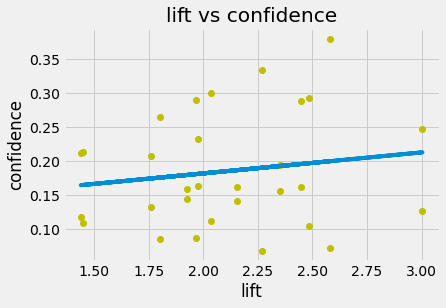

In [50]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

In [51]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Baby Spinach),(Banana),0.075232,0.147169,0.016027,0.213029,1.447518,0.004955,1.083689
1,(Organic Baby Spinach),(Bag of Organic Bananas),0.075232,0.117912,0.015623,0.207664,1.761175,0.006752,1.113275
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.066010,0.117912,0.019065,0.288816,2.449414,0.011281,1.240308
3,(Organic Raspberries),(Bag of Organic Bananas),0.042166,0.117912,0.012363,0.293191,2.486523,0.007391,1.247987
4,(Organic Raspberries),(Organic Strawberries),0.042166,0.082374,0.010435,0.247479,3.004339,0.006962,1.219403


In [ ]:
#APRIORI

In [52]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori!
Apriori Execution took: 118.90518569946289 seconds


In [53]:
apriori_matrix.head()

,support,itemsets,number_of_items
0,0.011656,(100% Raw Coconut Water),1
1,0.019129,(100% Whole Wheat Bread),1
2,0.011620,(2% Reduced Fat Milk),1
3,0.026629,(Apple Honeycrisp Organic),1
4,0.020613,(Asparagus),1


In [54]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

In [58]:
apriori_rule_lift.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(Organic Strawberries),(Organic Raspberries),0.082374,0.042166,0.010435,0.126682,3.004339,0.006962,1.096775
28,(Organic Raspberries),(Organic Strawberries),0.042166,0.082374,0.010435,0.247479,3.004339,0.006962,1.219403
16,(Organic Fuji Apple),(Banana),0.027823,0.147169,0.010569,0.379861,2.581126,0.006474,1.375226
17,(Banana),(Organic Fuji Apple),0.147169,0.027823,0.010569,0.071816,2.581126,0.006474,1.047396
4,(Organic Raspberries),(Bag of Organic Bananas),0.042166,0.117912,0.012363,0.293191,2.486523,0.007391,1.247987
5,(Bag of Organic Bananas),(Organic Raspberries),0.117912,0.042166,0.012363,0.104847,2.486523,0.007391,1.070023
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.066010,0.117912,0.019065,0.288816,2.449414,0.011281,1.240308
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.117912,0.066010,0.019065,0.161687,2.449414,0.011281,1.114130
26,(Organic Hass Avocado),(Organic Strawberries),0.066010,0.082374,0.012793,0.193798,2.352663,0.007355,1.138209
27,(Organic Strawberries),(Organic Hass Avocado),0.082374,0.066010,0.012793,0.155300,2.352663,0.007355,1.105706


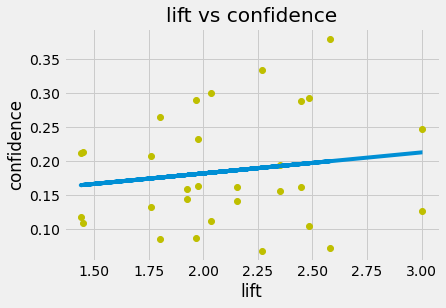

In [56]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

In [57]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.075232,0.117912,0.015623,0.207664,1.761175,0.006752,1.113275
1,(Organic Hass Avocado),(Bag of Organic Bananas),0.066010,0.117912,0.019065,0.288816,2.449414,0.011281,1.240308
2,(Organic Raspberries),(Bag of Organic Bananas),0.042166,0.117912,0.012363,0.293191,2.486523,0.007391,1.247987
3,(Organic Strawberries),(Bag of Organic Bananas),0.082374,0.117912,0.019184,0.232893,1.975136,0.009471,1.149888
4,(Cucumber Kirby),(Banana),0.030143,0.147169,0.010058,0.333677,2.267308,0.005622,1.279906


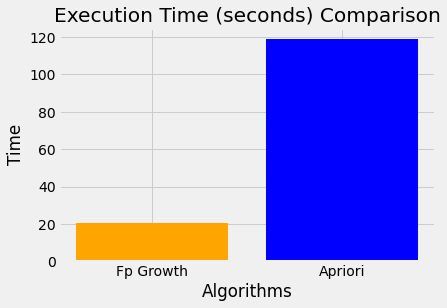

In [59]:


algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]

compare_time_exec(algo1, algo2)

